## [ 웹크롤링 _ 나무위키 사이트 분석 및 시각화 ]

### <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

[웹크롤링 라이브러리 사용하기]
- 파이썬에서는 BeautifulSoup과 requests라는 라이브러리로 웹 크롤러를 만들 수 있음
- requests는 특정 URL로부터 HTML 문서를 가져오는 작업을 수행
- 나무위키와 같은 페이지는 HTML 문서가 Javascript로 동적 로딩되는 경우가 있음
- requests 대신 셀레니움(selenium) 라이브러리를 이용해 크롬 브라우저로 동적 웹크롤링 수행
- selenium은 웹 브라우저를 자동으로 구동해주는 라이브러리
- selenium을 사용하기 위해 크롬 드라이버를 이용해 크롬 브라우저 자동으로 구동=> 크롬드라이버 필요

### [BeautifulSoup과 selenium을 이용한 웹 크롤링]
- anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치
- (env_name) pip install selenium
- (env_name) pip install beautifulsoup4

### [크롬 브라우저 업데이트 및 크롬 드라이버 설치]
- 크롬 브라우저 설정에서 최신 버전으로 업데이트
- 크롬 드라이버 사이트에서 브라우저 버전에 맞는 드라이버 다운로드
  - https://chromedriver.chromium.org/downloads
- chromedriver.exe 파일을 노트북 파일 경로에 이동

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### [ BeautifulSoup의 select() VS find_all() ]
- HTML의 특정 요소 선택
- select, select_one 의 경우 CSS 선택자를 이용하는 것처럼 사용 가능
- select의 경우 후손이나 자손 요소를 CSS 처럼 선택 가능
- 예) soup.select("dl > dt > a") 
- find_all, find 의 경우 하나의 태그(name="table")나 하나의 클래스(class="tables")를 선택
- find의 경우 후손이나 자손 요소를 직접 선택할 수 없어 한번 더 변수에 담든지 루프 문을 이용해야 함
- 예) find_all(class="ah_roll"), find(name="table")

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re # 정규식 표현을 위한 모듈


# 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path=excutable_path)

# 사이트의 html 구조에 기반하여 크롤링을 수행
source_url = "https://namu.wiki/RecentChanges" # 크롤링할 사이트 주소를 정의
driver.get(source_url)  # 크롬 드라이버를 통해 URL의 HTML 문서 가져옴

# 영진씨 방법
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "app")))

# 명진씨 방법
import time
time.sleep(10)

req = driver.page_source
soup = BeautifulSoup(req, "html.parser") # BeautifulSoup의 soup 객체로 변환

#contents_table = soup.find(name="table")  
#table_body = contents_table.find(name="tbody")
#table_rows = table_body.find_all(name="tr")
table_rows = soup.select("table tbody tr")

In [3]:
req 

'<html><head><link href="/skins/senkawa/6.bddc475dc7d04f3dd214.css" rel="stylesheet"><link href="/skins/senkawa/3.1f90685a4739537e8579.css" rel="stylesheet"><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link rel="stylesheet" type="text/css" href="/skins/senkawa/10.dbed4ccbaf33c2150c42.css"><script charset="utf-8" src="/skins/senkawa/10.dbed4ccbaf33c2150c42.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" rel="canonical" href="https://namu.wiki/RecentChanges"><link data-n-head="1" rel="search" type="application/opensearchdescription+xml" title="나무위키" href="/opensearch.xml">

In [4]:
soup

<html><head><link href="/skins/senkawa/6.bddc475dc7d04f3dd214.css" rel="stylesheet"/><link href="/skins/senkawa/3.1f90685a4739537e8579.css" rel="stylesheet"/><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link href="/skins/senkawa/10.dbed4ccbaf33c2150c42.css" rel="stylesheet" type="text/css"/><script charset="utf-8" src="/skins/senkawa/10.dbed4ccbaf33c2150c42.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" href="https://namu.wiki/RecentChanges" rel="canonical"/><link data-n-head="1" href="/opensearch.xml" rel="search" title="나무위키" type="application/opensearchdescription+xm

In [5]:
# contents_table

In [6]:
# table_body

In [7]:
table_rows

[<tr class="" data-v-17ff653d=""><td data-v-17ff653d=""><a data-v-17ff653d="" href="/w/%EA%B9%80%EC%B1%84%EC%9B%90(%EB%8C%84%EC%84%9C)">김채원(댄서)</a> <a data-v-17ff653d="" href="/history/%EA%B9%80%EC%B1%84%EC%9B%90(%EB%8C%84%EC%84%9C)">[역사]</a> <a data-v-17ff653d="" href="/diff/%EA%B9%80%EC%B1%84%EC%9B%90(%EB%8C%84%EC%84%9C)?rev=5&amp;oldrev=4">[비교]</a> <a data-v-17ff653d="" href="/discuss/%EA%B9%80%EC%B1%84%EC%9B%90(%EB%8C%84%EC%84%9C)">[토론]</a> <span data-v-17ff653d="">(<span class="f1ikwb5W" data-v-17ff653d="" data-v-6cbb5b59="">-3</span>)</span></td> <td data-v-17ff653d=""><div class="v-popover" data-v-169795f2="" data-v-17ff653d=""><div aria-describedby="popover_j0m0cfh3cf" class="trigger" style="display: inline-block;"><a data-v-169795f2="">211.196.10.235</a> </div> </div> <!-- --></td> <td data-v-17ff653d=""><time data-v-17ff653d="" datetime="2022-01-20T06:17:30.000Z">2022-01-20 15:17:30</time></td></tr>,
 <tr class="" data-v-17ff653d=""><td data-v-17ff653d=""><a data-v-17ff653d="

In [8]:
len(table_rows)

131

### [페이지 링크주소 리스트 가져오기]

In [9]:
page_url_base = "https://namu.wiki" # 베이스 URL 정의
page_urls = [] # href 속성값을 담기 위한 빈 리스트 생성 

for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all("td")[0]
    td_url = first_td.find_all("a")
    if len(td_url) > 0:
        # 특정 속성 선택시 attrs["속성명"] 또는 get("속성명") 사용
        # page_url = page_url_base + td_url[0].get("href")
        # attrs는 딕셔너리 형태로 속성명과 속성값을 불러옴
        # attrs["href"]는 attrs 결과 중 key가 href인 것의 값만 불러옴
        page_url = page_url_base + td_url[0].attrs["href"] 
        if "png" not in page_url:
            page_urls.append(page_url)
            print(page_urls)

['https://namu.wiki/w/%EA%B9%80%EC%B1%84%EC%9B%90(%EB%8C%84%EC%84%9C)']
['https://namu.wiki/w/%EA%B9%80%EC%B1%84%EC%9B%90(%EB%8C%84%EC%84%9C)', 'https://namu.wiki/w/%EA%B5%AD%EB%B0%A9%EA%B0%9C%ED%98%81%20%EA%B8%B0%EB%B3%B8%EA%B3%84%ED%9A%8D(2014~2030)']
['https://namu.wiki/w/%EA%B9%80%EC%B1%84%EC%9B%90(%EB%8C%84%EC%84%9C)', 'https://namu.wiki/w/%EA%B5%AD%EB%B0%A9%EA%B0%9C%ED%98%81%20%EA%B8%B0%EB%B3%B8%EA%B3%84%ED%9A%8D(2014~2030)', 'https://namu.wiki/w/%EC%9A%B0%EC%86%9D/%EA%B8%B0%EC%88%A0']
['https://namu.wiki/w/%EA%B9%80%EC%B1%84%EC%9B%90(%EB%8C%84%EC%84%9C)', 'https://namu.wiki/w/%EA%B5%AD%EB%B0%A9%EA%B0%9C%ED%98%81%20%EA%B8%B0%EB%B3%B8%EA%B3%84%ED%9A%8D(2014~2030)', 'https://namu.wiki/w/%EC%9A%B0%EC%86%9D/%EA%B8%B0%EC%88%A0', 'https://namu.wiki/w/%ED%85%94%EB%A1%9C%EB%AF%B8%EC%96%B4']
['https://namu.wiki/w/%EA%B9%80%EC%B1%84%EC%9B%90(%EB%8C%84%EC%84%9C)', 'https://namu.wiki/w/%EA%B5%AD%EB%B0%A9%EA%B0%9C%ED%98%81%20%EA%B8%B0%EB%B3%B8%EA%B3%84%ED%9A%8D(2014~2030)', 'https://namu.wiki

In [10]:
td_url[0].attrs

{'data-v-17ff653d': '',
 'href': '/w/%EB%B2%9A%EA%BD%83%20%EB%82%B4%EB%A6%AC%EB%8A%94%20%EC%8B%9C%EB%8C%80%EC%97%90%20%EA%B2%B0%ED%88%AC%EB%A5%BC/%EC%B9%B4%EB%93%9C/%EC%B9%B4%EB%82%98%EC%97%90'}

In [11]:
page_urls

['https://namu.wiki/w/%EA%B9%80%EC%B1%84%EC%9B%90(%EB%8C%84%EC%84%9C)',
 'https://namu.wiki/w/%EA%B5%AD%EB%B0%A9%EA%B0%9C%ED%98%81%20%EA%B8%B0%EB%B3%B8%EA%B3%84%ED%9A%8D(2014~2030)',
 'https://namu.wiki/w/%EC%9A%B0%EC%86%9D/%EA%B8%B0%EC%88%A0',
 'https://namu.wiki/w/%ED%85%94%EB%A1%9C%EB%AF%B8%EC%96%B4',
 'https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:0213GQPrezFacialHair8.jpg',
 'https://namu.wiki/w/%EC%A0%95%EC%9C%A4%EC%97%B4',
 'https://namu.wiki/w/%ED%8F%89%ED%83%9D%EC%8B%9C',
 'https://namu.wiki/w/%ED%96%89%EC%A0%95%EA%B5%AC%EC%97%AD%20%EA%B0%9C%ED%8E%B8/%EC%88%98%EB%8F%84%EA%B6%8C/%EA%B2%BD%EA%B8%B0%EB%8F%84%20%EB%B6%84%EB%8F%84',
 'https://namu.wiki/w/Kaiju%20Universe',
 'https://namu.wiki/w/%EB%A1%9C%EC%8A%A4%ED%8A%B8%EC%95%84%ED%81%AC/%ED%8C%A8%EB%9F%AC%EB%94%94',
 'https://namu.wiki/w/%EC%93%B8%EB%AA%A8%EC%97%86%EB%8A%94%20%EC%8A%A4%ED%82%AC%EC%97%90%20%EC%9D%B8%EC%83%9D%EC%9D%84%20%EC%8F%9F%EC%95%84%EB%B6%80%EC%9D%80%20%EC%A7%80%2025%EB%85%84%2C%20%EB%95%8C%EB%8A%A6%EC%9D%80%20%EC%

### [각 링크 페이지내 텍스트 구조를 확인하여 제목, 카테고리, 내용 출력]

In [12]:
# 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path=excutable_path)
# 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
driver.get(page_urls[0])  # page_urls[0] 의 정보를 가져옴
req = driver.page_source # 페이지 소스를 req에 저장
soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

### 타이틀 추출
title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1

### 카테고리 추출
category = contents_table.find_all('ul')[0]

### 내용 추출
#contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
#div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
content_paragraphs = contents_table.select("div.wiki-paragraph")  

#  내용으로 추출한 리스트를 하나의 문자열로 전처리
content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
# content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
for paragraphs in content_paragraphs: # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    content_corpus_list.append(paragraphs.text)  # 가져온 결과 태그 중 텍스트만 추출하여 content_corpus_list에 추가
content_corpus =" ".join(content_corpus_list) #"텍스트".join(리스트명) => 리스트의 요소를 "텍스트"로 구분하여 하나의 문자열로 만듦

print(title.text) # 제목 출력
print("\n")
print(category.text) # 카테고리 출력
print("\n")
print(content_corpus) # 내용 출력

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

김채원(댄서) 


대한민국의 안무가대한민국의 여성 댄서2004년 출생스트릿댄스 걸스 파이터/참가자서울공연예술고등학교 출신


 김채원Chae_1 본명 김채원 출생 2004년 9월 23일 (18세) 국적  대한민국 신체 166cm, 240mm 가족 부모님, 여동생 학력  서울공연예술고등학교 (실용무용과 12기) 소속 크루 턴즈 (2021년 ~ )  별명 채채, 복숭아[1], 물복숭아 MBTI INFJ 링크  1. 개요 대한민국의 여성 댄서, 안무가.  댄스의 주 장르는 힙합, 팝핑이다.  서공예 선배 조나인과 송희수, 서공예 12기 동기 김나현과 친구 박난주와 함께 스트릿 걸스 파이터에 턴즈 크루원으로 참가하였다.  


### [각각 링크 페이지를 크롤링하여 제목, 카테고리, 내용 출력]

In [13]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

#for page_url in page_urls:
for i in range(10):
    # 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
    excutable_path = "chromedriver.exe"
    driver = webdriver.Chrome(executable_path=excutable_path)
    # 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
    #driver.get(page_url)  # page_urls[i],  page_url의 정보를 가져옴
    driver.get(page_urls[i])  # page_urls[i],  page_url의 정보를 가져옴
    req = driver.page_source # 페이지 소스를 req에 저장
    soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
    contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

    ### 타이틀 추출
    title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
        
    ### 카테고리 추출
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0: # article ul 로 검색한 결과 여러 ul 결과가 나올 경우
        category = contents_table.find_all("ul")[0] # 제일 첫번째 article ul 을 category로 설정
    else:
        category = None
        
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""

    ### 내용 추출
    #contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
    #div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
    content_paragraphs = contents_table.select("div.wiki-paragraph")  
    #  내용으로 추출한 리스트를 하나의 문자열로 전처리
    content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
    
    # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")

    # 모든 정보를 하나의 데이터 프레임에 저장하기 위해서 시리즈 생성
    # 각 페이지의 정보를 추출하여 제목, 카테고리, 내용 순으로 행을 생성
    row = [row_title, row_category, "".join(content_corpus_list)]
    # 시리즈로 만듦
    series = pd.Series(row, index=df.columns)
    # 데이터 프레임에 시리즈를 추가, 한 페이지 당 하나의 행 추가
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

In [14]:
# 데이터 프레임을 출력합니다.
df


,title,category,content_text
0,김채원(댄서),대한민국의 안무가대한민국의 여성 댄서2004년 출생스트릿댄스 걸스 파이터/참가자서울...,김채원Chae_1본명김채원출생2004년 9월 23일 (18세)국적 대한민국신체166...
1,국방개혁 기본계획(2014~2030),박근혜 정부대한민국 국군,박근혜 정부 [ 펼치기 · 접기 ]구성인사여당새누리당 → 자유한국당정책 및 방향초...
2,우솝/기술,밀짚모자 일당원피스(만화)/등장인물/기술우솝,상위 문서: 우솝1. 개요2. 저격술2.1. 은하새총2.2. 투구2.3. 검은...
3,텔로미어,분자생물학생화학의학,분자생물학 · 생화학+ Molecular Biology · Biochemistry ...
4,파일:0213GQPrezFacialHair8.jpg,2022-01-20 15:17:21 r2 (삭제) (-793) sky_nintend...,
5,정윤열,대구상원고등학교 출신중앙대학교 출신1942년 출생울릉군 출신 인물울릉군수대한민국의 ...,정치인/목록 경상북도 울릉군수민선3기민선4-5기민선5-6기40대오창근 →41-42...
6,평택시,평택시,가입 후 15일이 지나야 편집 가능한 문서입니다.+경기도기초자치단체경기도기초자...
7,행정구역 개편/수도권/경기도 분도,행정구역 개편,상위 문서: 행정구역 개편/수도권+ 대한민국의 행정구역 개편 [ 펼치기 · 접...
8,Kaiju Universe,Roblox/게임/성장 및 노가다,Kaiju Universe제작자Prometeo Games ™제작 날짜2019년 10...
9,로스트아크/패러디,로스트아크패러디,상위 문서: 로스트아크 [ 펼치기 · 접기 ]로스트아크 관련 정보스토리스토리 ...


## [명사만을 추출하여 워드 클라우드 그리기]

### [코엔엘파이(konlpy)를 이용한 형태소 분석]

- 품사란 단어를 기능, 형태, 의미에 따라 나눈 갈래
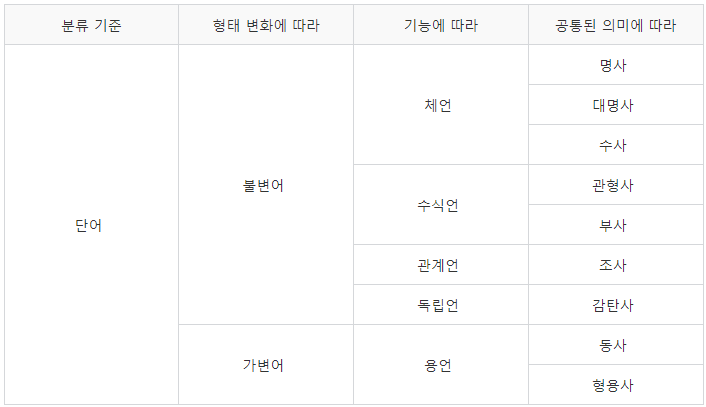

#### [형태소 분석과 품사태깅]
- 형태소 : 더 이상 분리를 할 수 없는 의미를 갖는 최소 단어를 의미
- 형태소 분석 : 형태소를 비롯하여, 어근,접두사/접미사, 품사(POS,part-of-search)등 다양한 언어적 속성의 구조를 파악하는 것
- - 품사태깅 : 형태소와 품사를 매칭시키는 것

#### [빈도 분석 : 문장 형태소 분석 - KoNLPy]
 - KoNLPy : 파이썬 한국어 형태소 분석 라이브러리

# <Step2. 추출> : 키워드 추출
### [텍스트 데이터 전처리] 정규식을 사용하여 한글과 띄어쓰기만 가져오기
#### 파이썬 정규표현식(re) 사용법
- 정규표현식 : 컴파일 => re.compile, 컴파일을 미리 해 두고 이를 저장
- 정규표현식 : 치환 => re.subn(pattern,repl,string,count,flags)

#한글 코드 범위

#ㄱ\~ㅎ : 0x3131~0x314e

#ㅏ\~ㅣ : 0x314f~0x3163

#가\~힣 : 0xac00~0xd7a3

In [15]:
import re

#사용자 정의 함수 선언
def text_cleaning(text):
    hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')#[^ㄱ-|가-힣+] 한글과 띄어쓰기의 정규식 패턴 ^ => [안에 범위] 포함 없을경우 제거
    result=hangul.sub('',text) #한글과 띄어쓰기를 제외한 모든 글자 패턴을 ''빈 문자로 치환
    return result

print(text_cleaning('반갑습니다'))

반갑습니다


In [16]:
print(text_cleaning(df['title'][0]))

김채원댄서 


In [17]:
print(text_cleaning(df['category'][0]))

대한민국의 안무가대한민국의 여성 댄서년 출생스트릿댄스 걸스 파이터참가자서울공연예술고등학교 출신


In [18]:
print(text_cleaning(df['content_text'][0]))

김채원본명김채원출생년 월 일 세국적 대한민국신체 가족부모님 여동생학력 서울공연예술고등학교 실용무용과 기소속 크루턴즈 년   별명채채 복숭아 물복숭아링크 개요대한민국의 여성 댄서 안무가 댄스의 주 장르는 힙합 팝핑이다서공예 선배 조나인과 송희수 서공예 기 동기 김나현과 친구 박난주와 함께 스트릿 걸스 파이터에 턴즈 크루원으로 참가하였다


In [19]:
#각 피처마다 데이터 전처리 적용 한글과 띄어쓰기를 제외한 모든 부분을 제거
df['title']=df['title'].apply(lambda x : text_cleaning(x))
df['category']=df['category'].apply(lambda x : text_cleaning(x))
df['content_text']=df['content_text'].apply(lambda x : text_cleaning(x))
df.head()

,title,category,content_text
0,김채원댄서,대한민국의 안무가대한민국의 여성 댄서년 출생스트릿댄스 걸스 파이터참가자서울공연예술고...,김채원본명김채원출생년 월 일 세국적 대한민국신체 가족부모님 여동생학력 서울공연예술고...
1,국방개혁 기본계획,박근혜 정부대한민국 국군,박근혜 정부 펼치기 접기 구성인사여당새누리당 자유한국당정책 및 방향초이노믹스...
2,우솝기술,밀짚모자 일당원피스만화등장인물기술우솝,상위 문서 우솝 개요 저격술 은하새총 투구 검은 투구 초록성 성장 기타 우솝 전...
3,텔로미어,분자생물학생화학의학,분자생물학 생화학 펼치기 접기 유전체 기본 구조아데닌 티민 구아닌...
4,파일,삭제 미사용 파일은 따로 분류하지 않고 삭제하는 것을 ...,


In [20]:
#각 피처마다 말뭉치를 생성
title_corpus="".join(df['title'].tolist())
category_corpus="".join(df['category'].tolist())
content_corpus="".join(df['content_text'].tolist())
print(title_corpus)
print(category_corpus)
print(content_corpus)

김채원댄서 국방개혁 기본계획 우솝기술 텔로미어 파일 정윤열 평택시 행정구역 개편수도권경기도 분도   로스트아크패러디 
대한민국의 안무가대한민국의 여성 댄서년 출생스트릿댄스 걸스 파이터참가자서울공연예술고등학교 출신박근혜 정부대한민국 국군밀짚모자 일당원피스만화등장인물기술우솝분자생물학생화학의학   삭제              미사용 파일은 따로 분류하지 않고 삭제하는 것을 우선합니다            새 문서              파일 을 올림         대구상원고등학교 출신중앙대학교 출신년 출생울릉군 출신 인물울릉군수대한민국의 가톨릭 신자공무원 출신 정치인평택시행정구역 개편게임성장 및 노가다로스트아크패러디
김채원본명김채원출생년 월 일 세국적 대한민국신체 가족부모님 여동생학력 서울공연예술고등학교 실용무용과 기소속 크루턴즈 년   별명채채 복숭아 물복숭아링크 개요대한민국의 여성 댄서 안무가 댄스의 주 장르는 힙합 팝핑이다서공예 선배 조나인과 송희수 서공예 기 동기 김나현과 친구 박난주와 함께 스트릿 걸스 파이터에 턴즈 크루원으로 참가하였다 박근혜 정부  펼치기  접기 구성인사여당새누리당  자유한국당정책 및 방향초이노믹스  증세 없는 복지  노동개혁  국방개혁 기본계획  임금피크제  국정화 교과서  창조경제  유라시아 이니셔티브  행복주택  뉴스테이  테러방지법  위안부 합의  한일 군사정보포괄보호협정  한반도 신뢰 프로세스  문화가 있는 날  대 사회악  멈춰 캠페인  대학구조개혁평가평가대통령 이전  경제  외교  지지율비판정책 분야  민주주의 후퇴  자질  역사관  개인처신 문제  최태민과의 부적절한 관계  사이비 종교 논란  국민갈등타임라인년월  월  월  월  월  월  월  월  월  월  월  월년월  월  월  월  월  월  월  월  월  월  월  월년월  월  월  월  월  월  월  월  월  월  월  월년월  월  월  월  월  월  월  월  월  월  월  월년월  월  월별도 문서가 없는 평가 및 논란은 해당 주제 관련 문서를 

In [21]:
from konlpy.tag import Okt
from collections import Counter
#konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger=Okt()
nouns=nouns_tagger.nouns(content_corpus)
count=Counter(nouns)
count

Counter({'김': 4,
         '채원': 2,
         '본명': 2,
         '출생': 2,
         '년': 142,
         '월': 159,
         '일': 46,
         '국적': 3,
         '대한민국': 26,
         '신체': 1,
         '가족': 3,
         '부모님': 2,
         '여동생': 1,
         '학력': 2,
         '서울': 70,
         '공연예술': 1,
         '고등학교': 68,
         '실용': 2,
         '무용': 1,
         '소속': 17,
         '루턴': 1,
         '별명': 11,
         '채채': 1,
         '복숭아': 2,
         '물': 6,
         '링크': 2,
         '개요': 8,
         '여성': 5,
         '댄서': 2,
         '안무가': 1,
         '댄스': 1,
         '주': 18,
         '장르': 4,
         '힙합': 1,
         '팝핑': 1,
         '공예': 2,
         '선배': 1,
         '나인': 1,
         '송': 8,
         '희수': 1,
         '기': 15,
         '동기': 3,
         '나현': 1,
         '친구': 3,
         '박': 4,
         '난주': 1,
         '스트릿': 1,
         '걸스': 1,
         '파이터': 2,
         '턴즈': 1,
         '크루': 2,
         '참가': 4,
         '박근혜': 10,
         '정부': 12,
         '

In [22]:
#한 글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x)>1})
print(remove_char_counter)

Counter({'평택': 310, '경기': 215, '경기도': 210, '지역': 207, '북도': 156, '북부': 146, '문서': 126, '초등학교': 122, '이전': 118, '역사': 114, '평택시': 112, '사용': 110, '괴수': 109, '문단': 107, '기술': 106, '때문': 106, '인구': 100, '퀘스트': 100, '이름': 96, '경우': 95, '업적': 94, '남부': 76, '가능성': 73, '분도': 73, '송탄': 71, '남도': 71, '서울': 70, '고등학교': 68, '문제': 66, '패러디': 62, '도시': 59, '후보': 56, '중학교': 55, '게임': 55, '사람': 54, '고덕': 54, '일부': 51, '현재': 50, '유저': 48, '중앙': 46, '수도권': 45, '고속도로': 44, '한국': 42, '관할': 42, '국도': 42, '광역시': 42, '정도': 41, '안중': 39, '비전동': 38, '위치': 37, '미군': 37, '개발': 36, '단체': 36, '민주당': 36, '이후': 35, '격차': 35, '또한': 34, '하나': 34, '김포시': 34, '다만': 33, '다른': 33, '통합': 33, '대사': 32, '선거': 32, '행정': 32, '버스': 32, '신설': 32, '동네': 32, '자치': 31, '이야기': 31, '상황': 30, '포함': 30, '말단': 30, '수도': 30, '거의': 30, '행정구역': 30, '기준': 30, '한강': 30, '관련': 29, '위해': 29, '처음': 29, '존재': 29, '학교': 29, '투표': 29, '득표율': 29, '실제': 28, '도청': 28, '신장동': 28, '해당': 27, '설치': 27, '우솝': 27, '내용': 27, '논의': 27, '대한민국': 26, '모두': 26,

In [23]:
#한국어 약식 불용어 사전 예시 파일
korean_stopwords_path = 'stopwords.txt'

#텍스트 파일 오픈
with open(korean_stopwords_path,encoding='utf8') as f:
    stopwords = f.readlines()
stopwords=[x.strip() for x in stopwords]
print(stopwords[:10])

#불용어 추가
namu_wiki_stopwords=['상위','문서','내용','누설','아래','해당','설명','표기','추가','모든',
                     '사용','매우','가장','줄거리','요소','상황', '편집', '틀', '경우', 
                     '때문', '모습', '정도', '이후', '사실', '생각', '인물', '이름','년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)
    
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']
Counter({'평택': 310, '경기': 215, '경기도': 210, '지역': 207, '북도': 156, '북부': 146, '초등학교': 122, '이전': 118, '역사': 114, '평택시': 112, '괴수': 109, '문단': 107, '기술': 106, '인구': 100, '퀘스트': 100, '업적': 94, '남부': 76, '가능성': 73, '분도': 73, '송탄': 71, '남도': 71, '서울': 70, '고등학교': 68, '문제': 66, '패러디': 62, '도시': 59, '후보': 56, '중학교': 55, '게임': 55, '사람': 54, '고덕': 54, '일부': 51, '현재': 50, '유저': 48, '중앙': 46, '수도권': 45, '고속도로': 44, '한국': 42, '관할': 42, '국도': 42, '광역시': 42, '안중': 39, '비전동': 38, '위치': 37, '미군': 37, '개발': 36, '단체': 36, '민주당': 36, '격차': 35, '김포시': 34, '통합': 33, '대사': 32, '선거': 32, '행정': 32, '버스': 32, '신설': 32, '동네': 32, '자치': 31, '이야기': 31, '포함': 30, '말단': 30, '수도': 30, '행정구역': 30, '기준': 30, '한강': 30, '관련': 29, '위해': 29, '처음': 29, '존재': 29, '학교': 29, '투표': 29, '득표율': 29, '실제': 28, '도청': 28, '신장동': 28, '설치': 27, '우솝': 27, '논의': 27, '대한민국': 26, '고양시': 26, '의원': 26, '분할': 26, '참고': 25, '소립': 25, '인천': 25, '정당': 25, '도지사': 25, '대부분': 24, '방송': 24,

In [24]:
import random
import pytagcloud
import webbrowser

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


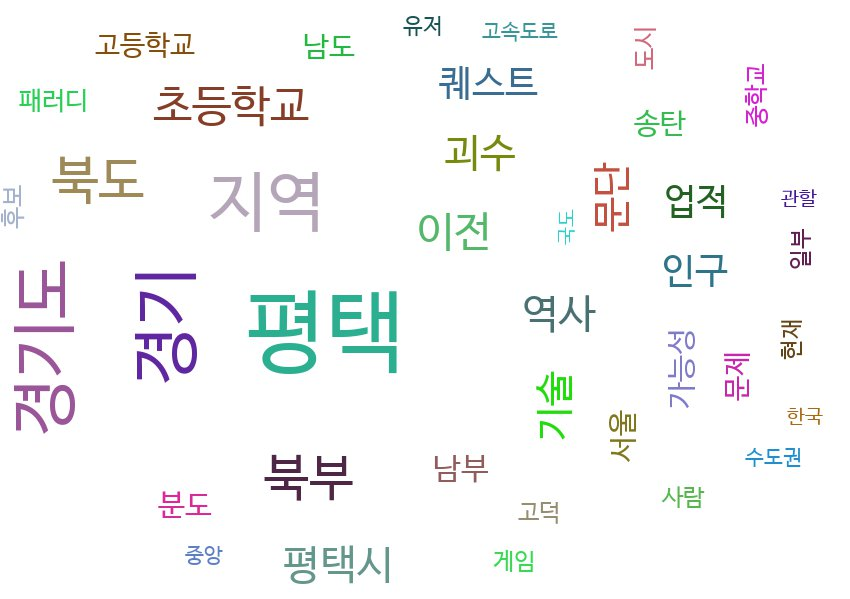

In [25]:
#가장 출현 빈도수가 높은 40개의 단어 선정
ranked_tags=remove_char_counter.most_common(40)

#pytagcloud로 출력할 40개의 단어 입력 최대크기는 80으로 제한
taglist=pytagcloud.make_tags(ranked_tags,maxsize=80)

#pytagcloud 이미지를 생성합니다.
pytagcloud.create_tag_image(taglist,'wordcloud.jpg',size=(900,600),fontname='NanumGothic',rectangular=False)

#생성한 이미지를 주피터 노트북상에서 출력
from IPython.display import Image
Image(filename='wordcloud.jpg')